    1(a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo;
    Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png


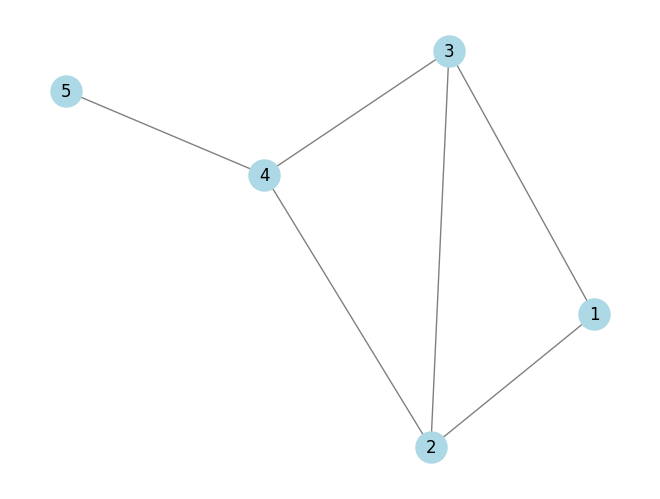

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar um objeto do tipo grafo
grafo = nx.Graph()

# Adicionar nós ao grafo
grafo.add_nodes_from([1, 2, 3, 4, 5])

# Adicionar arestas ao grafo
grafo.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# Mostrar o grafo
nx.draw(grafo, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.show()

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Criar o grafo
grafo = nx.Graph()
grafo.add_nodes_from([1, 2, 3, 4, 5])
grafo.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# Simular uma caminhada aleatória com 100 passos
np.random.seed(42)  # Define a semente aleatória para reproduzibilidade
start_node = 1  # Nó inicial da caminhada aleatória
num_steps = 100  # Número de passos

# Inicializar a matriz de visitas
visits_matrix = np.zeros((len(grafo.nodes), len(grafo.nodes)))

# Realizar a caminhada aleatória
current_node = start_node
for _ in range(num_steps):
    visits_matrix[current_node - 1, current_node - 1] += 1  # Incrementa a visita ao nó atual
    neighbors = list(grafo.neighbors(current_node))
    next_node = np.random.choice(neighbors)  # Escolhe um vizinho aleatório para o próximo passo
    current_node = next_node

# Exibir a matriz de visitas
print("Matriz de Visitas:")
print(visits_matrix)

# Calcular a centralidade do eigenvector
eigenvector_centrality = nx.eigenvector_centrality(grafo)

# Exibir a centralidade do eigenvector para cada vértice
print("\nCentralidade do Eigenvector:")
for node, centrality in eigenvector_centrality.items():
    print(f"Vértice {node}: {centrality}")

Matriz de Visitas:
[[15.  0.  0.  0.  0.]
 [ 0. 27.  0.  0.  0.]
 [ 0.  0. 25.  0.  0.]
 [ 0.  0.  0. 23.  0.]
 [ 0.  0.  0.  0. 10.]]

Centralidade do Eigenvector:
Vértice 1: 0.40669315164993997
Vértice 2: 0.5370767614119433
Vértice 3: 0.5370767614119433
Vértice 4: 0.4747503533204841
Vértice 5: 0.17974951217077526


2 - (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

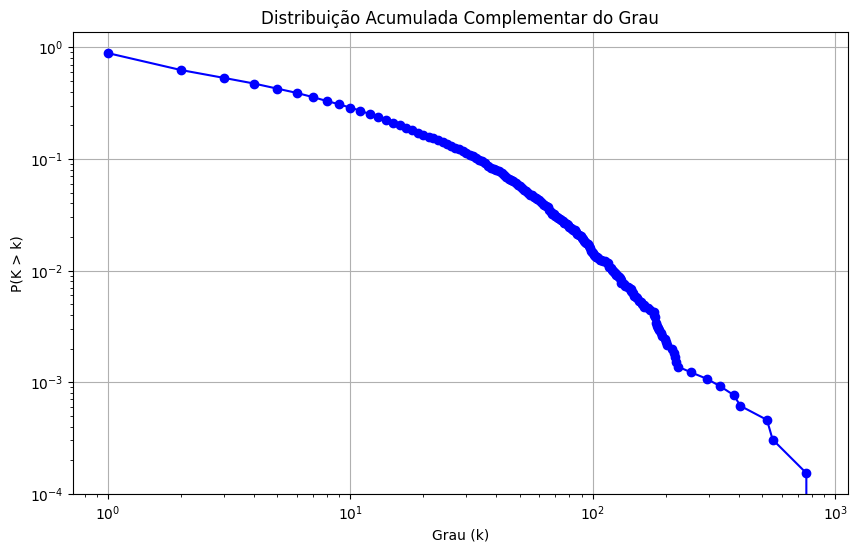

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Carregar a rede a partir do arquivo
graph = nx.read_edgelist("advogato.txt", nodetype=int)

# Calcular a distribuição de grau
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
degree_count = np.unique(degree_sequence, return_counts=True)
degrees = degree_count[0]
degree_counts = degree_count[1]

# Calcular a distribuição acumulada complementar do grau
degree_cdf = 1 - np.cumsum(degree_counts) / sum(degree_counts)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(degrees, degree_cdf, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grau (k)')
plt.ylabel('P(K > k)')
plt.title('Distribuição Acumulada Complementar do Grau')
plt.grid(True)
plt.show()

(b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

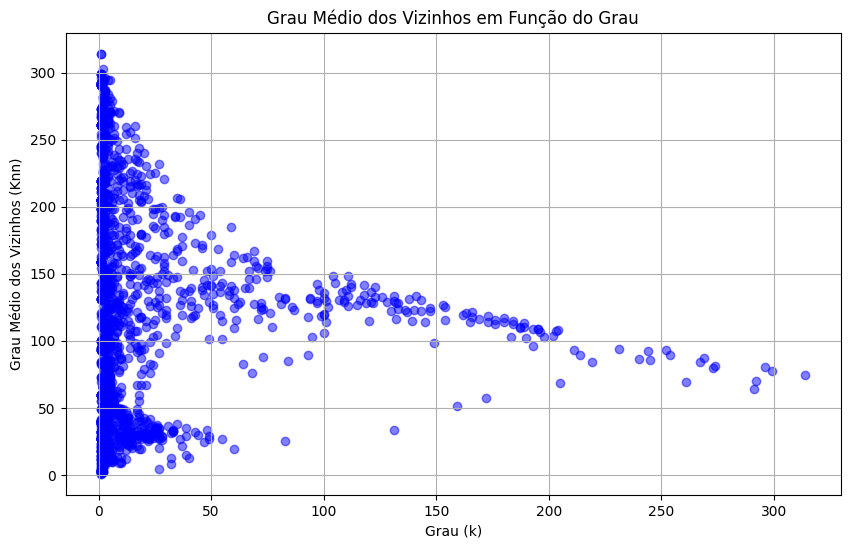

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Carregar a rede a partir do arquivo
graph = nx.read_weighted_edgelist("USairport_2010.txt", nodetype=int)

# Calcular o grau médio dos vizinhos para cada grau k
k_values = []
knn_values = []

for node in graph.nodes:
    k = graph.degree(node)
    knn = nx.average_neighbor_degree(graph, nodes=[node])[node]
    k_values.append(k)
    knn_values.append(knn)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(k_values, knn_values, color='b', alpha=0.5)
plt.xlabel("Grau (k)")
plt.ylabel("Grau Médio dos Vizinhos (Knn)")
plt.title("Grau Médio dos Vizinhos em Função do Grau")
plt.grid(True)
plt.show()

(c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Ler a rede do arquivo
grafo = nx.read_adjlist("advogato.txt", delimiter="\t")

# Calcular a matriz de menores distâncias
matriz_distancias = nx.floyd_warshall_numpy(grafo)

# Calcular a matriz A^n para diferentes valores de n
n_values = [1, 2, 3, 4, 5]  # Valores de n
correlations = []  # Lista para armazenar as correlações

for n in n_values:
    matriz_potencia = np.eye(len(grafo.nodes))  # Matriz identidade inicial
    for _ in range(n):
        matriz_potencia = np.dot(nx.adjacency_matrix(grafo).todense(), matriz_potencia)
    
    correlation = np.corrcoef(matriz_distancias.flatten(), matriz_potencia.flatten())[0, 1]
    correlations.append(correlation)

# Plotar o gráfico de correlação entre D_ij e A_ij para diferentes valores de n
plt.plot(n_values, correlations, 'o-')
plt.xlabel("n")
plt.ylabel("Correlação")
plt.title("Correlação entre D_ij e A_ij para diferentes valores de n")
plt.grid(True)
plt.show()


3 - Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valoes em uma lista e imprima essa lista, indicando os valores de cada medida.

In [4]:
import networkx as nx
import numpy as np

# Carregar a rede a partir do arquivo GML
graph = nx.read_gml("internet_routers-22july06.gml")

# Obter o maior componente conexo
largest_component = max(nx.connected_components(graph), key=len)
graph_largest_component = graph.subgraph(largest_component)

# Calcular as medidas
degree_sequence = [degree for _, degree in graph_largest_component.degree()]
average_degree = np.mean(degree_sequence)
transitivity = nx.transitivity(graph_largest_component)
second_moment = np.mean(np.power(degree_sequence, 2))
degree_entropy = nx.degree_assortativity_coefficient(graph_largest_component)
assortativity = nx.degree_assortativity_coefficient(graph_largest_component)

# Armazenar os valores em uma lista
measures_list = [average_degree, transitivity, second_moment, degree_entropy, assortativity]

# Imprimir os valores de cada medida
measure_names = ['Grau Médio', 'Transitividade', 'Segundo Momento', 'Entropia de Shannon', 'Coeficiente de Assortatividade']
for name, value in zip(measure_names, measures_list):
    print(f"{name}: {value}")


Grau Médio: 4.218612550624918
Transitividade: 0.011146383847822162
Segundo Momento: 1103.0002177415843
Entropia de Shannon: -0.1983848751205647
Coeficiente de Assortatividade: -0.1983848751205647


4 - Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness

In [7]:
import networkx as nx
import numpy as np
from scipy.stats import pearsonr

# Carregar a rede a partir do arquivo
graph = nx.read_weighted_edgelist("USairport_2010.txt", nodetype=int)

# Simulação SIR
def simulate_sir(graph, beta, gamma):
    # Inicialização dos estados dos nós
    for node in graph.nodes:
        graph.nodes[node]['state'] = 'S'

    # Seleção de um nó inicialmente infectado
    initial_node = np.random.choice(graph.nodes)
    graph.nodes[initial_node]['state'] = 'I'

    # Simulação da propagação
    while 'I' in [graph.nodes[node]['state'] for node in graph.nodes]:
        for node in graph.nodes:
            if graph.nodes[node]['state'] == 'I':
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if graph.nodes[neighbor]['state'] == 'S' and np.random.random() < beta:
                        graph.nodes[neighbor]['state'] = 'I'
                if np.random.random() < gamma:
                    graph.nodes[node]['state'] = 'R'

    # Cálculo da fração final de recuperados
    recovered_fraction = sum([1 for node in graph.nodes if graph.nodes[node]['state'] == 'R']) / len(graph.nodes)
    return recovered_fraction

# Parâmetros da simulação
gamma = 0.1  # Taxa de recuperação

# Valores de beta a serem testados
beta_values = [0.05, 0.1, 0.15, 0.2, 0.25]

# Dicionário para armazenar os resultados
results = {}

# Realizar a simulação e calcular as medidas de centralidade para cada valor de beta
for beta in beta_values:
    centralities = ['degree', 'betweenness', 'eigenvector', 'closeness']
    correlations = {}

    for centrality in centralities:
        if centrality == 'degree':
            centrality_scores = dict(graph.degree)
        elif centrality == 'betweenness':
            centrality_scores = nx.betweenness_centrality(graph)
        elif centrality == 'eigenvector':
            centrality_scores = nx.eigenvector_centrality(graph)
        elif centrality == 'closeness':
            centrality_scores = nx.closeness_centrality(graph)

        recovered_fractions = []

        for _ in range(10):  # Realizar 10 simulações para cada valor de beta
            recovered_fraction = simulate_sir(graph, beta, gamma)
            recovered_fractions.append(recovered_fraction)

        avg_recovered_fraction = np.mean(recovered_fractions)
        correlations[centrality] = avg_recovered_fraction

    results[beta] = correlations

# Imprimir as médias da fração final de recuperados para cada medida de centralidade e valor de beta
for beta, correlations in results.items():
    print(f"Valor de beta: {beta}")
    for centrality, avg_recovered_fraction in correlations.items():
        print(f"Média da fração final de recuperados ({centrality}): {avg_recovered_fraction}")


Valor de beta: 0.05
Média da fração final de recuperados (degree): 0.45127064803049555
Média da fração final de recuperados (betweenness): 0.522554002541296
Média da fração final de recuperados (eigenvector): 0.44618805590851335
Média da fração final de recuperados (closeness): 0.4475857687420584
Valor de beta: 0.1
Média da fração final de recuperados (degree): 0.8484752223634053
Média da fração final de recuperados (betweenness): 0.5930114358322744
Média da fração final de recuperados (eigenvector): 0.604574332909784
Média da fração final de recuperados (closeness): 0.6841804320203304
Valor de beta: 0.15
Média da fração final de recuperados (degree): 0.6228081321473952
Média da fração final de recuperados (betweenness): 0.8963786531130877
Média da fração final de recuperados (eigenvector): 0.8971410419313852
Média da fração final de recuperados (closeness): 0.7998729351969505
Valor de beta: 0.2
Média da fração final de recuperados (degree): 0.8329097839898347
Média da fração final de 

5 - Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

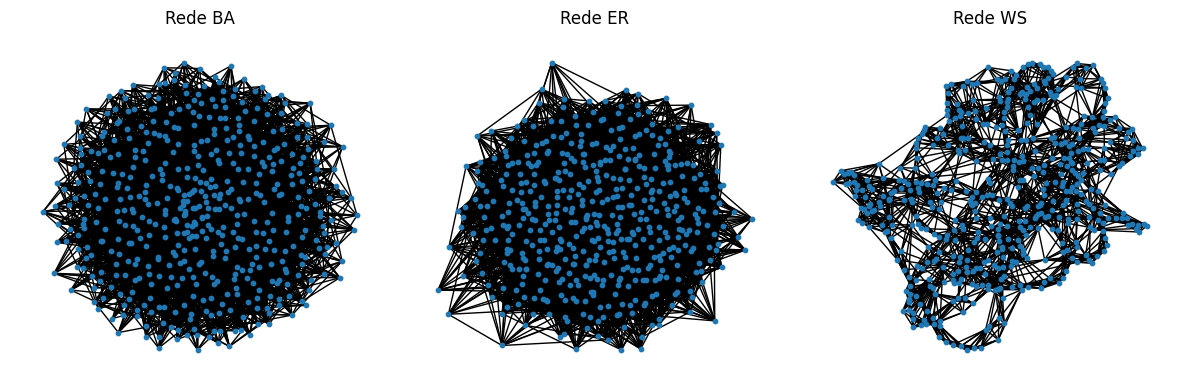

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Parâmetros da rede
N = 500  # Número de nós
K = 10  # Grau médio
p = 0.05  # Probabilidade de rewiring (para a rede WS)

# Geração da rede BA
ba_graph = nx.barabasi_albert_graph(N, K)

# Geração da rede ER
er_graph = nx.erdos_renyi_graph(N, p)

# Geração da rede WS
ws_graph = nx.watts_strogatz_graph(N, K, p)

# Plotagem das redes
plt.figure(figsize=(12, 4))

# Rede BA
plt.subplot(131)
nx.draw(ba_graph, node_size=10)
plt.title('Rede BA')

# Rede ER
plt.subplot(132)
nx.draw(er_graph, node_size=10)
plt.title('Rede ER')

# Rede WS
plt.subplot(133)
nx.draw(ws_graph, node_size=10)
plt.title('Rede WS')

plt.tight_layout()
plt.show()

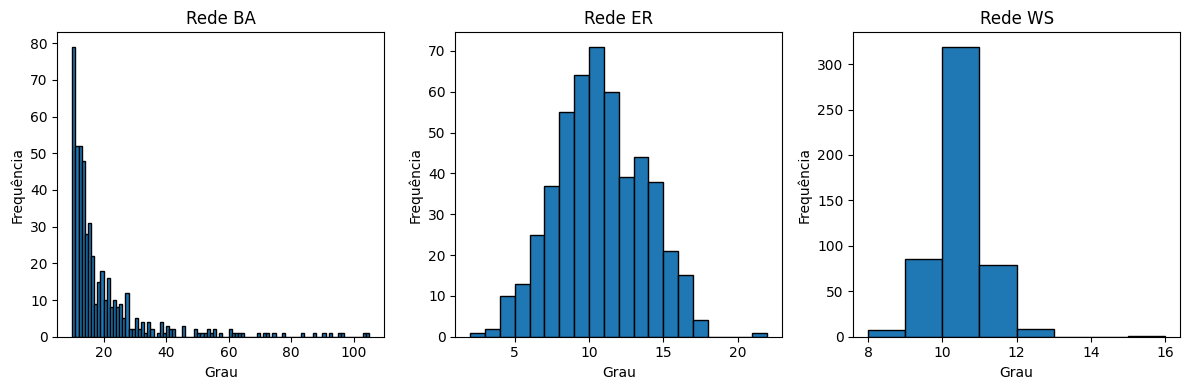

Coeficiente de Clustering Médio:
Rede BA: 0.09398601000749768
Rede ER: 0.018007722995958278
Rede WS: 0.5734062049062054
Caminhos Mais Curtos Médios:
Rede BA: 2.3646332665330663
Rede ER: 2.916080160320641
Rede WS: 4.553482965931864


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Geração das redes
ba_graph = nx.barabasi_albert_graph(N, K)
er_graph = nx.erdos_renyi_graph(N, K/(N-1))
ws_graph = nx.watts_strogatz_graph(N, K, p)

# Distribuição de grau
ba_degree = [degree for _, degree in ba_graph.degree()]
er_degree = [degree for _, degree in er_graph.degree()]
ws_degree = [degree for _, degree in ws_graph.degree()]

# Plotagem da distribuição de grau
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(ba_degree, bins=range(min(ba_degree), max(ba_degree) + 2), edgecolor='black')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Rede BA')

plt.subplot(132)
plt.hist(er_degree, bins=range(min(er_degree), max(er_degree) + 2), edgecolor='black')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Rede ER')

plt.subplot(133)
plt.hist(ws_degree, bins=range(min(ws_degree), max(ws_degree) + 2), edgecolor='black')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Rede WS')

plt.tight_layout()
plt.show()

# Coeficiente de clustering médio
ba_clustering = nx.average_clustering(ba_graph)
er_clustering = nx.average_clustering(er_graph)
ws_clustering = nx.average_clustering(ws_graph)

print('Coeficiente de Clustering Médio:')
print('Rede BA:', ba_clustering)
print('Rede ER:', er_clustering)
print('Rede WS:', ws_clustering)

# Caminhos mais curtos médios
ba_avg_path = nx.average_shortest_path_length(ba_graph)
er_avg_path = nx.average_shortest_path_length(er_graph)
ws_avg_path = nx.average_shortest_path_length(ws_graph)

print('Caminhos Mais Curtos Médios:')
print('Rede BA:', ba_avg_path)
print('Rede ER:', er_avg_path)
print('Rede WS:', ws_avg_path)